# Introduction to Matplotlib (pt. 1)
In this notebook we'll see fundamental Matplotlib concepts like Figure and Axes, interfaces, coordinates and layouts.

*Data visualization* is an huge area, here just some key concepts:

* What? Toolkit for **explore** and **explain** data, to reveal patterns, trends and relationships using "visual words" (color, shape,.
* Understand your data, select the right chart, the one that is most accurate and informative, avoiding misinterpretation. [Quick guide](http://droettboom.com/papers/journal.pcbi.1003833.pdf)
* Why? Direct observation of large datasets is infeasible to do.

## Python dataviz
We choose Matplotlib for these main reasons:
* De Facto standard as python visualization introductory tool.
* "Low level" library which other packages use to build upon it.
* Great for static graphic and publishing academic manuscript.
* Long history (since 2003!) and really good documentation with lot of [examples](https://matplotlib.org/3.1.0/gallery/index.html) 

Python data visualization landscape is huge and diversified, if you feel lost this is a [good reference to keep in mind](https://pyviz.org/overviews/index.html) 
![](misc/landscape-colors.png)

![](misc/d3js.gif)
![](misc/bokeh.gif)
![](misc/vispy.gif)

*Disclaimer: we use the term "plot" with the same meaning as in  [the first answer](https://english.stackexchange.com/questions/43027/whats-the-difference-between-a-graph-a-chart-and-a-plot).*

*Warning: we use numpy to generate dummy data, numpy will be presented in future lessons*.

## High level overview

In Matplotlib there two main object types:
* **Primitives**: objects which are directly drawn and visible to the viewer
* **Containers**: objects that keeps stuff organized

Matplotlib's plots are like russian dolls, we can think like containers inside other containers.
* [Figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html): the top level container
    * [Axes](https://matplotlib.org/api/axes_api.html): is the plot's drawing area and is the main object to manipulate for drawing stuff. It contains the vast majority of all the object (Artist class) used in a figure and a lot of **helper methods** to add, remove and customize the objects contained.
    
        * [Axis](https://matplotlib.org/api/axis_api.html): handle the drawing of the tick lines, the grid lines, the tick labels and the axis label. As similar as they seems: **Axes are not Axis**!
            * [Ticks](https://matplotlib.org/3.1.1/api/ticker_api.html)
                * Locator
                * Formatter
            * Axis labels
            * Spines
            
![](misc/anatomy_001.png)


Matplotlib does many things *automagically* to help reduce user's *boilerplate code*. Most appearence settings are already defined with (good) default values in [rcParams](https://matplotlib.org/tutorials/introductory/customizing.html) 

In [1]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
import numpy as np

if any errors are raised `> pip install -r minrequirements.txt`

#### Initial setup
The standard use is to create a Figure instance, use the Figure to create one or more Axes, and use the Axes instance helper methods to create the primitives.

Text(0.5, 1.0, 'Dummy Plot')

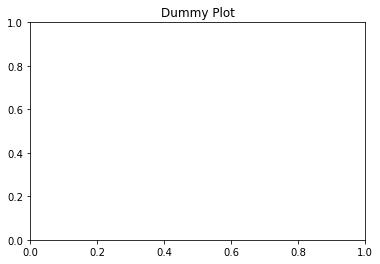

In [2]:
fig, ax = plt.subplots(1,1) # use pyplot interface helper
ax.set_title("Dummy Plot")


#### Plotting

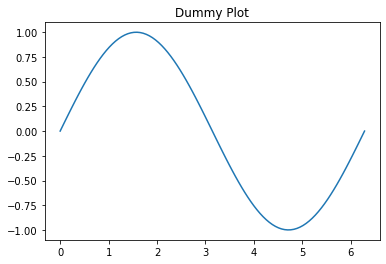

In [3]:
x = np.linspace(0,2*np.pi,100) # generate 100 equi-spaced point in (0,2pi) 
y = np.sin(x)

ax.plot(x,y,label="sine")
fig

What's happened here? 
We tell to matplotib to use our data (x and y lists) to draw an interpolating line between each $(x[i],y[i])$ point.

In [4]:
ax.lines[0]._xy # get the line artist internal data(_ prefix used for internal attributes hided from user)

array([[ 0.00000000e+00,  0.00000000e+00],
       [ 6.34665183e-02,  6.34239197e-02],
       [ 1.26933037e-01,  1.26592454e-01],
       [ 1.90399555e-01,  1.89251244e-01],
       [ 2.53866073e-01,  2.51147987e-01],
       [ 3.17332591e-01,  3.12033446e-01],
       [ 3.80799110e-01,  3.71662456e-01],
       [ 4.44265628e-01,  4.29794912e-01],
       [ 5.07732146e-01,  4.86196736e-01],
       [ 5.71198664e-01,  5.40640817e-01],
       [ 6.34665183e-01,  5.92907929e-01],
       [ 6.98131701e-01,  6.42787610e-01],
       [ 7.61598219e-01,  6.90079011e-01],
       [ 8.25064737e-01,  7.34591709e-01],
       [ 8.88531256e-01,  7.76146464e-01],
       [ 9.51997774e-01,  8.14575952e-01],
       [ 1.01546429e+00,  8.49725430e-01],
       [ 1.07893081e+00,  8.81453363e-01],
       [ 1.14239733e+00,  9.09631995e-01],
       [ 1.20586385e+00,  9.34147860e-01],
       [ 1.26933037e+00,  9.54902241e-01],
       [ 1.33279688e+00,  9.71811568e-01],
       [ 1.39626340e+00,  9.84807753e-01],
       [ 1.

**Interpolation Smoothness**

Line smoothness depends on number of data points

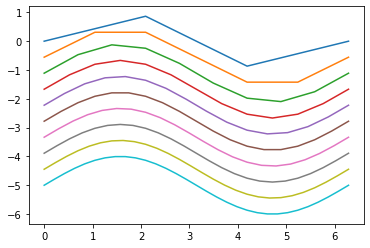

In [5]:
fig2, ax2 = plt.subplots(1,1)

for n,k in zip(range(4,50,3),np.linspace(0,5,10)):
    x = np.linspace(0,2*np.pi,n)
    y = np.sin(x)-k
    ax2.plot(x,y)

    

Since we have plotted multiple lines, axes now collects all of them

In [6]:
ax2.lines

#### Changing view limits
View limits act like zooming and panning in the axes drawing area. Since we have generated only points in $[0,2\pi)$, the line is drawn only on this range.

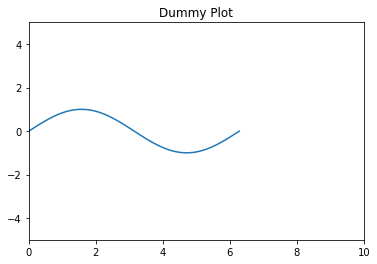

In [7]:
xlim = 10
ylim = 5
ax.set_xlim(0,xlim)
ax.set_ylim(-ylim,ylim)
fig

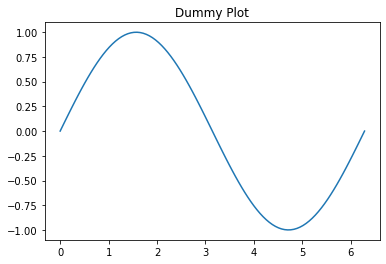

In [8]:
ax.autoscale() # automatically reset view limits to data limits
fig

#### Working on axis
We can customize the axis properties, as good practice, we must always denote the quantities in our plot.
XAxis & YAxis are accessible through `xaxis` e `yaxis` instance variables. If you don't need any special customization, Axes class provides a bunch of helper methods that forwards calls to the axis instances. 

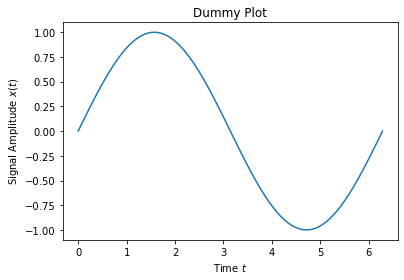

In [9]:
ax.xaxis.set_label_text("Time $t$") # retrieving XAxis instance (we can write latex too!)
ax.set_ylabel("Signal Amplitude $x(t)$") # use Axes helper method as shortcut
fig

Thicks are significant elements when reading a plot because gives **scale** and **orientation** in data dimensions. Matplotlib uses a "smart" deafult behaviour, but we can (and should) customize ticks locations and labels in meaningful way. For instance since sine is usually expressed in radians we can modify the ticks location only on radians main values.

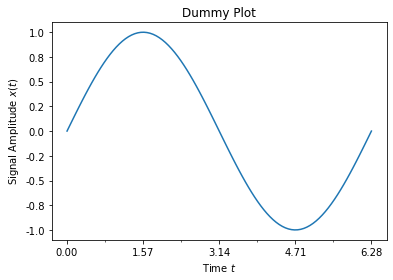

In [10]:
import matplotlib.ticker as ticker

# 1st step: set ticks location
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=np.pi/2)) ## Meaningful ticks for sine
ax.xaxis.set_minor_locator(ticker.MultipleLocator(base=np.pi/4))

# 2nd step: set ticks labes
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}")) 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.1f}")) # Avoid information overloading with too many decimal digits
fig

A little [additional work](https://matplotlib.org/gallery/units/radian_demo.html) should be done to display ticks label using radians' symbols

#### Basic Styling

In [11]:
# generate synthetic data
x = np.linspace(0,2*np.pi,100)
sig1 = np.sin(x)
sig2 = np.sin(x*2) *0.5
sig3 = np.sin(x*4) *0.25
sig4 = np.sin(x*8) *0.125

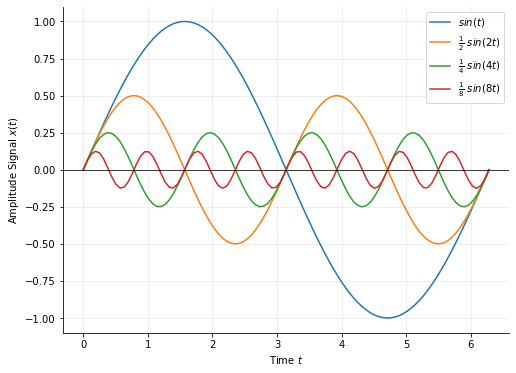

In [12]:
fig, ax = plt.subplots(1,1,figsize=(8,6))

ax.plot(x,sig1,label="$sin(t)$")
ax.plot(x,sig2,label="$\\frac{1}{2} \ sin(2t)$")
ax.plot(x,sig3,label="$\\frac{1}{4} \ sin(4t)$")
ax.plot(x,sig4,label="$\\frac{1}{8} \ sin(8t)$")

#remove top & right "borders" aka spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# draw an "x axis" line
ax.axhline(color='black',linewidth="0.75")

ax.set_xlabel("Time $t$")
ax.set_ylabel("Amplitude Signal $x(t)$")

ax.grid(True, alpha=0.25)

ax.legend() # the colors are automagically assigned by default cycler instance

Once our plot is ready we can [save the figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.savefig) to a file

In [13]:
fig.savefig("plot.png")

## Matplotlib Interfaces
So far we've seen how to draw plots using objects like Figure and Axes but Matplotlib provides two different ways to interact with the API:
* OO interface: use Figure and Axes objects to draw objects and plot your data.
* pyplot interface: use a MATLAB-like state machine to **implicitly** keep track of the current object to drawn on.

**The OO interface is the preferred way to use Matplotlib** but for the sake of completeness let's see a quick dummy example


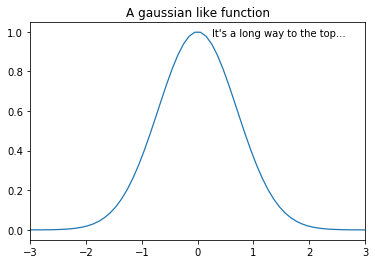

In [14]:
import matplotlib.pyplot as plt
x = np.linspace(-5,5,100)
y = np.exp((-x**2))

plt.plot(x,y,linewidth=1.25)
plt.title("A gaussian like function")
plt.text(0.25,0.98,"It's a long way to the top...")
plt.xlim(-3,3)

plt.show()


What pyplot interface really is? Just a module that wrapper the OOP interface and forwards calls to the right objects maintaining a state among them!

As a matter of fact we could use `plt.gcf()`, `plt.gca()` functions to retrieve the current (the last one used) figure and axes instances and work in OO fashion.

Here's my two cents, you should use with pyplot interface if:
* You need to prototype solutions quickly
* You have a strong matlab background

Otherwise **use OOP interface**! ([Explicit is better than implicit](https://en.wikipedia.org/wiki/Zen_of_Python))

In [15]:
import this # let's get nerdy

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Coordinates
After plotting data one of the common task is to annotate data with some kind of graphic (text, arrows, circles, etc.). Matplotlib use different coordinates system for drawing objects:

 * Data coordinates: drawing primitives relative to data
 * Axes coordinates: drawing primitives relative to Axes bounding box
 * Figure coordinates: drawing primitives relative to Figure bounding box
 
Figure and Axes' coordinates are expressed as normalized offset (distance) from origin. The origin is located at $(0,0)$ (bottom left), and the extent is $(1,1)$ (top right). The key point to remember when reasoning about coordinates is that what really change is the **frame of reference**.
 
Let's see a quick example where the min/max points of a changing slope line affect the text position (since is drawn in data coordinates)

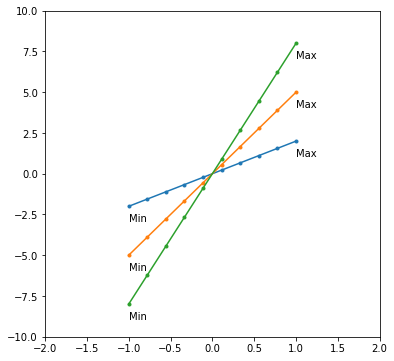

In [16]:
fig,ax = plt.subplots(1,1,figsize=(6,6))
x = np.linspace(-1,1,10)

angles=[2,5,8]
text_offset = -0.95

ax.set_xlim(-2,2)
ax.set_ylim(-10,10)

for angle in angles:
    y = x*angle
    ax.plot(x,y,marker=".")
   
    # get min & max points
    xmin, ymin = x[np.argmin(y)],np.min(y)
    xmax, ymax = x[np.argmax(y)],np.max(y)

    # draw text relative to data coordinates
    ax.text(xmin,ymin+text_offset,"Min") 
    ax.text(xmax,ymax+text_offset,"Max")



Text(0.5, 0.5, 'Figure center')

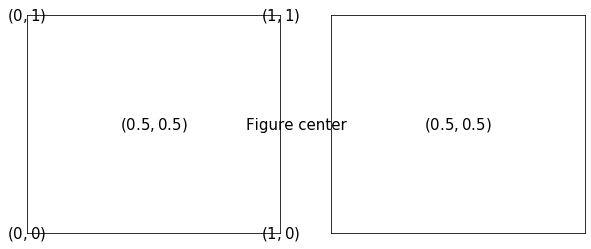

In [17]:
fig, axes = plt.subplots(1,2,figsize=(10,4))

ax0 = axes[0]
ax1 = axes[1]

# remove ticks 
ax0.tick_params(axis='both', which='both', 
                bottom=False, top=False, 
                labelbottom=False, right=False, 
                left=False, labelleft=False)
ax1.tick_params(axis='both', which='both', 
                bottom=False, top=False, 
                labelbottom=False, right=False, 
                left=False, labelleft=False)

#setup text properties
textprops = {'va':'center',
             'ha':'center',
             'size':15}

## Draw text in ax0 Axes coordinates
ax0.text(0,0,"$(0,0)$", transform=ax0.transAxes, fontdict=textprops)
ax0.text(0,1,"$(0,1)$", transform=ax0.transAxes, fontdict=textprops)
ax0.text(0.5,0.5,"$(0.5,0.5)$", transform=ax0.transAxes, fontdict=textprops)
ax0.text(1,1,"$(1,1)$",transform=ax0.transAxes,fontdict=textprops)
ax0.text(1,0,"$(1,0)$",transform=ax0.transAxes,fontdict=textprops)

# Draw text in ax1 Axes coordinates
ax1.text(0.5,0.5,"$(0.5,0.5)$", transform=ax1.transAxes, fontdict=textprops) 

# Draw text in Figure coordinates
fig.text(0.5,0.5,"Figure center",transform=fig.transFigure, fontdict=textprops) 

In [18]:
ax.texts # text instances are appended to Axes instance variable

[Text(-1.0, -2.95, 'Min'),
 Text(1.0, 1.05, 'Max'),
 Text(-1.0, -5.95, 'Min'),
 Text(1.0, 4.05, 'Max'),
 Text(-1.0, -8.95, 'Min'),
 Text(1.0, 7.05, 'Max')]

## Layouts
Matplotlib offers multiple ways to arrange multiple plots in one figure. Since this tutorial is a primer one,  we'll cover the two main approaches:

* Using helper function `pyplot.subplots()`: essential layout customization with **fixed** axes width/height
* Using `GridSpec` object: fine tuning of layout customization with **variable** axes' width/height

Using `subplots()` function allow to create a grid like layout of multiple plots


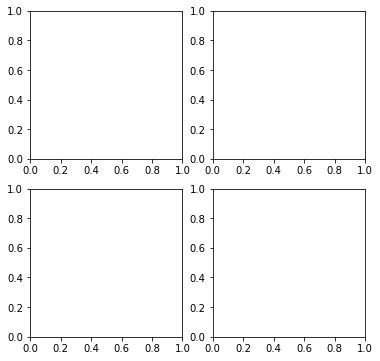

In [19]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows,ncols,figsize=(6,6))

Depending on  parameters' value passed to ``subplots()``, the function return an array or matrix of axes instances. For *bulky operations* a common usage pattern is to ravel the matrix to iterate on each one separately.

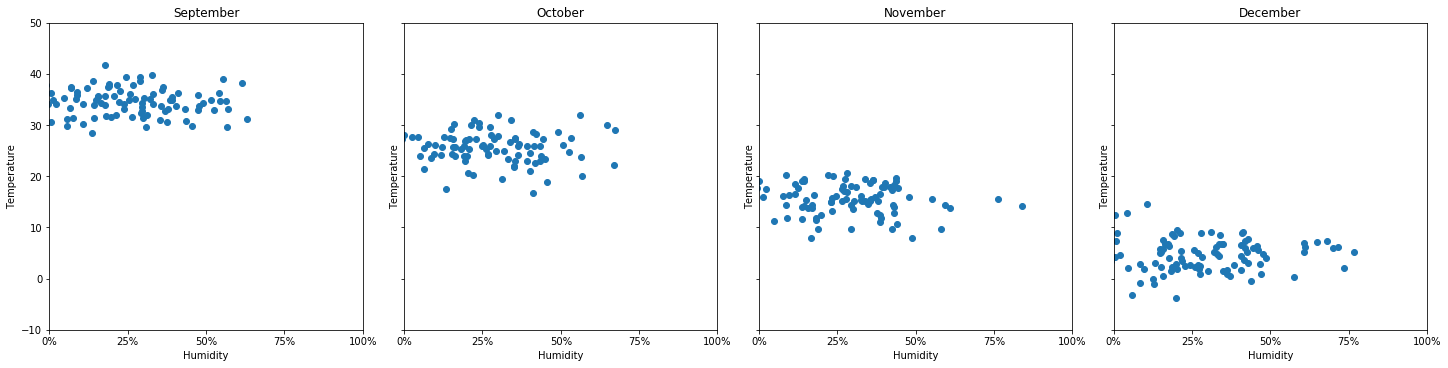

In [20]:
npoints = 100
names = ["September", "October", "November", "December"]
season_coeff = [0,10,20,30]

nrows = 1
ncols = 4
fig, axes = plt.subplots(nrows,ncols, figsize=(20,5), constrained_layout=True, sharey=True)

for ax, name, season in zip(axes.ravel(), names,season_coeff): ## common usage pattern
    #generate synthetic data
    y = np.random.normal(loc=35-season,scale=3, size=npoints)
    x = np.random.normal(loc=25,scale=20, size=npoints)
    ax.scatter(x,y,marker='o')
    # customize plot' appearence
    ax.set_title(name)
    ax.set_ylabel("Temperature")
    ax.set_xlabel("Humidity")
    
    ax.set_xlim([0,100])
    ax.set_ylim([-10,50])

    ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))
    ax.xaxis.set_major_formatter(ticker.PercentFormatter()) # better ticks semantic

#### Grid Specification
GridSpec class allows to build arbitrarly complex layouts. As the name suggest, the specification is based on a matrix-like structure and must be attached to a figure instance. You must define the matrix dimension a priori and then work with indeces to setup the axes spanning.
For a $3 \times 3$ grid, you can think to the specification as a matrix made in this way:

$$
gs =
\left[
\begin{array}{c|c|c}
(0,0) & (0,1) & (0,2) \\\hline
(1,0) & (1,1) & (1,2) \\\hline
(2,0) & (2,1) & (2,2) 
\end{array}
\right]
$$

The spanning is specified with a numpy's indexing style, a spanning rapresented by $a:b$ means **from** $a$ **included to** $b$ **excluded** (put in other words from $a$ to $b-1$ both included) 

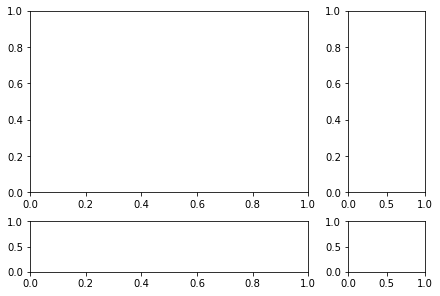

In [21]:
fig3 = plt.figure(constrained_layout=True)

gs = fig3.add_gridspec(3, 3) # attach a grid specification to the figure instance

f3_ax1 = fig3.add_subplot(gs[0:2, 0:2]) # spanning the first two rows and first two columns
f3_ax2 = fig3.add_subplot(gs[2, 0:2]) # third row, spanning first two columns
f3_ax3 = fig3.add_subplot(gs[0:2, 2]) # spanning first two rows , last column
f3_ax1 = fig3.add_subplot(gs[2, 2]) # last row and column


## What's next?
Today we only scratched the surface, starting from this you can:
* Go deeper, explore matplotlib charts types and styling customization capabilities (Introduction to Matplotlib pt2)
* Use Seaborn or Pandas to be effective
* Try a declarative library (like altair)

# Thanks !